In [289]:
import numpy as np
from typing import Union, List, Callable
import matplotlib.pyplot as plt

# Chapter 4.3-4.9 Numerical Integration

## Chapter 4.4 Composite Numerical Integration

### Composite Trapezoidal Rule

In [290]:
def Trapezoidal(func:Callable[[Union[float, int, np.ndarray]], Union[float, int]],
           a:Union[float, int],
           b:Union[float, int],
           h:Union[float, int]=None,
           N:int=None, 
           visualize:bool=False) -> float:
    if (h is None) and (N is None):
        raise ValueError("h and N cannot be None at the same time")
    elif h is None:
        h = (b - a) / N
    elif N is None:
        N = int((b - a) / h)
    approx = h * (func(a) + func(b)) / 2
    for idx in range(1, N):
        approx += h * func(a + idx * h)
    if visualize:
        plt.figure(figsize=(16, 12))
        x_ = np.linspace(a, b, 1000)
        plt.fill_between(x_, func(x_), alpha=0.5)
        plt.plot(x_, func(x_), 'r')
        x = np.linspace(a, b, N)
        for idx in range(N - 1):
            xs = [x[idx], x[idx], x[idx + 1], x[idx + 1]]
            ys = [0, func(x[idx]), func(x[idx + 1]), 0]
            plt.fill(xs, ys, 'g', edgecolor="black", alpha=0.8)
        plt.show()
    return approx

In [291]:
# Exercise Set 4.4 Question 1
# Question order: a,c,e,g,b,d,f,h

f = lambda x: x * np.log(x)
print(Trapezoidal(f, 1, 2, N=4))
f = lambda x: 2 / (x ** 2 + 4)
print(Trapezoidal(f, 0, 2, N=6))
f = lambda x: np.exp(2 * x) * np.sin(3 * x)
print(Trapezoidal(f, 0, 2, N=8))
f = lambda x: 1 / np.sqrt(x ** 2 - 4)
print(Trapezoidal(f, 3, 5, N=8))

f = lambda x: x ** 3 *  np.exp(x)
print(Trapezoidal(f, -2, 2, N=4))
f = lambda x: x ** 2 * np.cos(x)
print(Trapezoidal(f, 0, np.pi, N=6))
f = lambda x: x / (x ** 2 + 4)
print(Trapezoidal(f, 1, 3, N=8))
f = lambda x: np.tan(x)
print(Trapezoidal(f, 0, 3 * np.pi / 8, N=8))

0.639900477687986
0.7842407666178158
-13.575979391799388
0.6054975145421461
31.365285650063754
-6.428722218023163
0.4769768665147184
0.9709263066791302


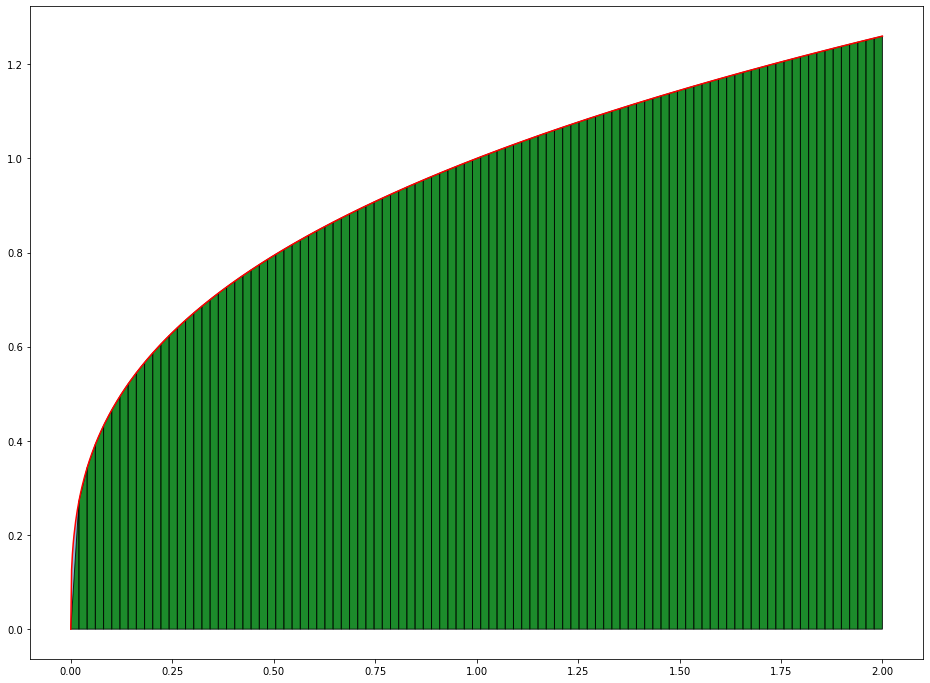

1.8883829246809403


In [292]:
f = lambda x: x ** (1 / 3)
print(Trapezoidal(f, 0, 2, N=100, visualize=True))

In [293]:
def Midpoint(func:Callable[[Union[float, int, np.ndarray]], Union[float, int]],
           a:Union[float, int],
           b:Union[float, int],
           h:Union[float, int]=None,
           N:int=None, 
           visualize:bool=False) -> float:
    if (h is None) and (N is None):
        raise ValueError("h and N cannot be None at the same time")
    elif h is None:
        h = (b - a) / N
    elif N is None:
        N = int((b - a) / h)
    step = h / 2
    midpoints = [a + idx * h + step for idx in range(N)]
    approx = 0

    for m in midpoints:
        approx += func(m) * h

    if visualize:
        plt.figure(figsize=(16, 12))
        x_ = np.linspace(a, b, 1000)
        plt.fill_between(x_, func(x_), alpha=0.5)
        plt.plot(x_, func(x_), 'r')
        x = np.linspace(a, b, N)
        for idx in range(len(midpoints)):
            plt.bar(midpoints[idx], func(midpoints[idx]), h, color='g', alpha=0.8, edgecolor="black")
            plt.plot([midpoints[idx], midpoints[idx]], [0, func(midpoints[idx])], linestyle="--", color="red")
        plt.xticks(midpoints)
        plt.show()
    return approx

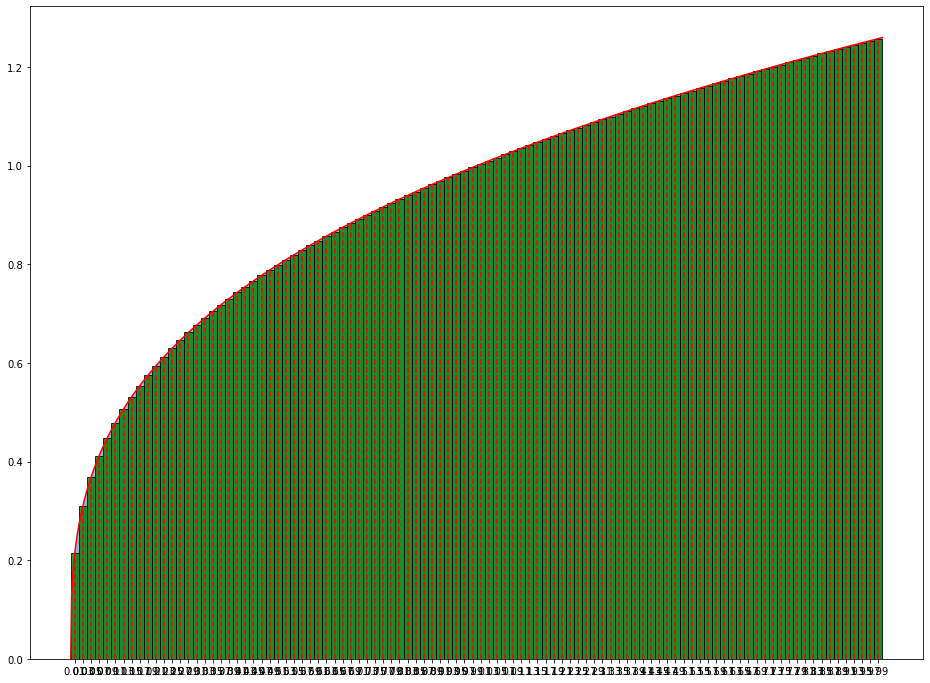

1.8901886898161397


In [294]:
f = lambda x: x ** (1 / 3)
print(Midpoint(f, 0, 2, N=100, visualize=True))